In [1]:
from keras.datasets import cifar100
import numpy as np
import collections, numpy

In [2]:
data=cifar100.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = data

169009152/169001437 [==============================] - 3s 0us/step: 


In [3]:
categories = [22,86,5,25,9,87,20,47,8,10]
X_train= []
Y_train=[]
k = 0
for i in categories:
    for j in range(500):
        X_train.append(x_train[np.where(y_train == i)[0][j]])
        Y_train.append(k)
    k += 1
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train.shape,Y_train.shape

((5000, 32, 32, 3), (5000,))

In [4]:
categories = [22,86,5,25,9,87,20,47,8,10]
X_test = []
Y_test =[]
k = 0
for i in categories:
    for j in range(100):
        X_test.append(x_test[np.where(y_test == i)[0][j]])
        Y_test.append(k)
    k += 1
    
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test.shape, Y_test.shape

((1000, 32, 32, 3), (1000,))

In [5]:
#data size
len(X_train)+len(X_test)

6000

In [6]:
#sample dimensions
X_train[0].shape

(32, 32, 3)

In [7]:
#train data calsses
unique, counts = numpy.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 500,
 1: 500,
 2: 500,
 3: 500,
 4: 500,
 5: 500,
 6: 500,
 7: 500,
 8: 500,
 9: 500}

In [8]:
#test data calsses
unique, counts = numpy.unique(Y_test, return_counts=True)
dict(zip(unique, counts))

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100}

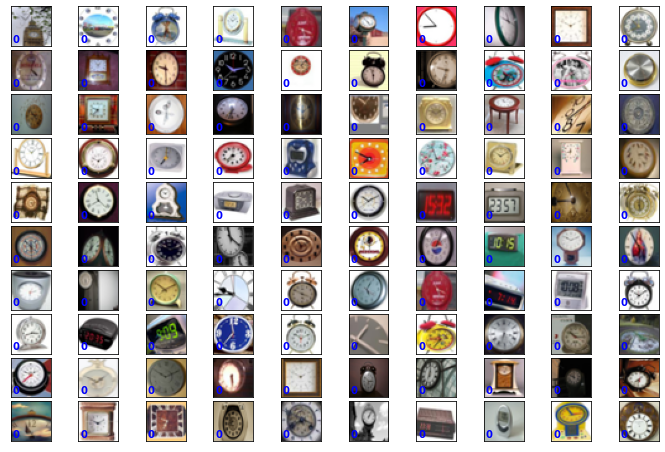

In [9]:
from matplotlib import pyplot
#ploting samples of the data
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = pyplot.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    pyplot.show()
plot_multiple_imgs(X_train, Y_train,10,10,(12,8))

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)
x_train = X_train
x_test = X_test
y_train.shape, y_test.shape

((5000, 10), (1000, 10))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D, Dropout, Activation
#building the model
model = Sequential()

model.add(Conv2D(128,(3,3), padding = 'same',activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [48]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, decay = 1e-6), metrics=['accuracy'])

In [49]:
#Train the model
hist=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 2s 32ms/step - loss: 3.1291 - accuracy: 0.1775 - val_loss: 3.4951 - val_accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 2s 29ms/step - loss: 1.9266 - accuracy: 0.2763 - val_loss: 4.2964 - val_accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 2s 25ms/step - loss: 1.7024 - accuracy: 0.3683 - val_loss: 4.7236 - val_accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 2s 25ms/step - loss: 1.5606 - accuracy: 0.4297 - val_loss: 5.8274 - val_accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 2s 26ms/step - loss: 1.4542 - accuracy: 0.4660 - val_loss: 5.7756 - val_accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 2s 27ms/step - loss: 1.3691 - accuracy: 0.5052 - val_loss: 6.0191 - val_accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 2s 28ms/step - loss: 1.2458 - accuracy: 0.5412 - val_loss: 7.5948 - val_accura

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D, Dropout, Activation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1
from tensorflow.keras.utils import plot_model
model = Sequential()
model.add(EfficientNetB0(input_shape = (32, 32, 3), include_top = False, weights = 'imagenet'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [20]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [14]:
#Train the model
hist=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
79/79 [==============================] - 3s 39ms/step - loss: 0.6131 - accuracy: 0.8282 - val_loss: 0.6297 - val_accuracy: 0.7820
Epoch 2/50
79/79 [==============================] - 3s 38ms/step - loss: 0.3555 - accuracy: 0.8900 - val_loss: 0.2197 - val_accuracy: 0.9160
Epoch 3/50
79/79 [==============================] - 3s 40ms/step - loss: 0.2675 - accuracy: 0.9104 - val_loss: 0.2128 - val_accuracy: 0.9380
Epoch 4/50
79/79 [==============================] - 3s 38ms/step - loss: 0.2117 - accuracy: 0.9356 - val_loss: 0.1362 - val_accuracy: 0.9480
Epoch 5/50
79/79 [==============================] - 3s 35ms/step - loss: 0.1695 - accuracy: 0.9448 - val_loss: 0.1577 - val_accuracy: 0.9570
Epoch 6/50
79/79 [==============================] - 4s 46ms/step - loss: 0.1921 - accuracy: 0.9406 - val_loss: 0.0911 - val_accuracy: 0.9670
Epoch 7/50
79/79 [==============================] - 3s 35ms/step - loss: 0.2268 - accuracy: 0.9290 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 8/50
79

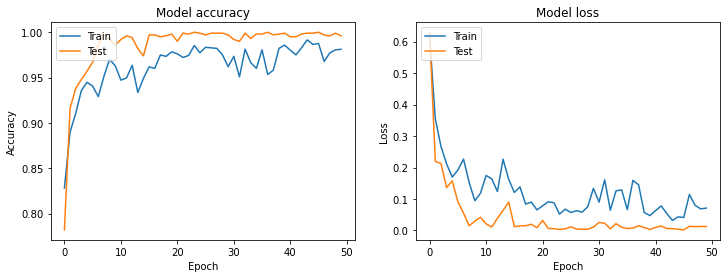

In [15]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

as you can see in the new model graphs, the model is more overfitted to the training data, eventhough the model is overfitted the testing results are also better then the previous model(raised from 43% to 55%).

model accuracy on test set is: 81.10%


Text(0.5, 1.0, 'classification results on test set')

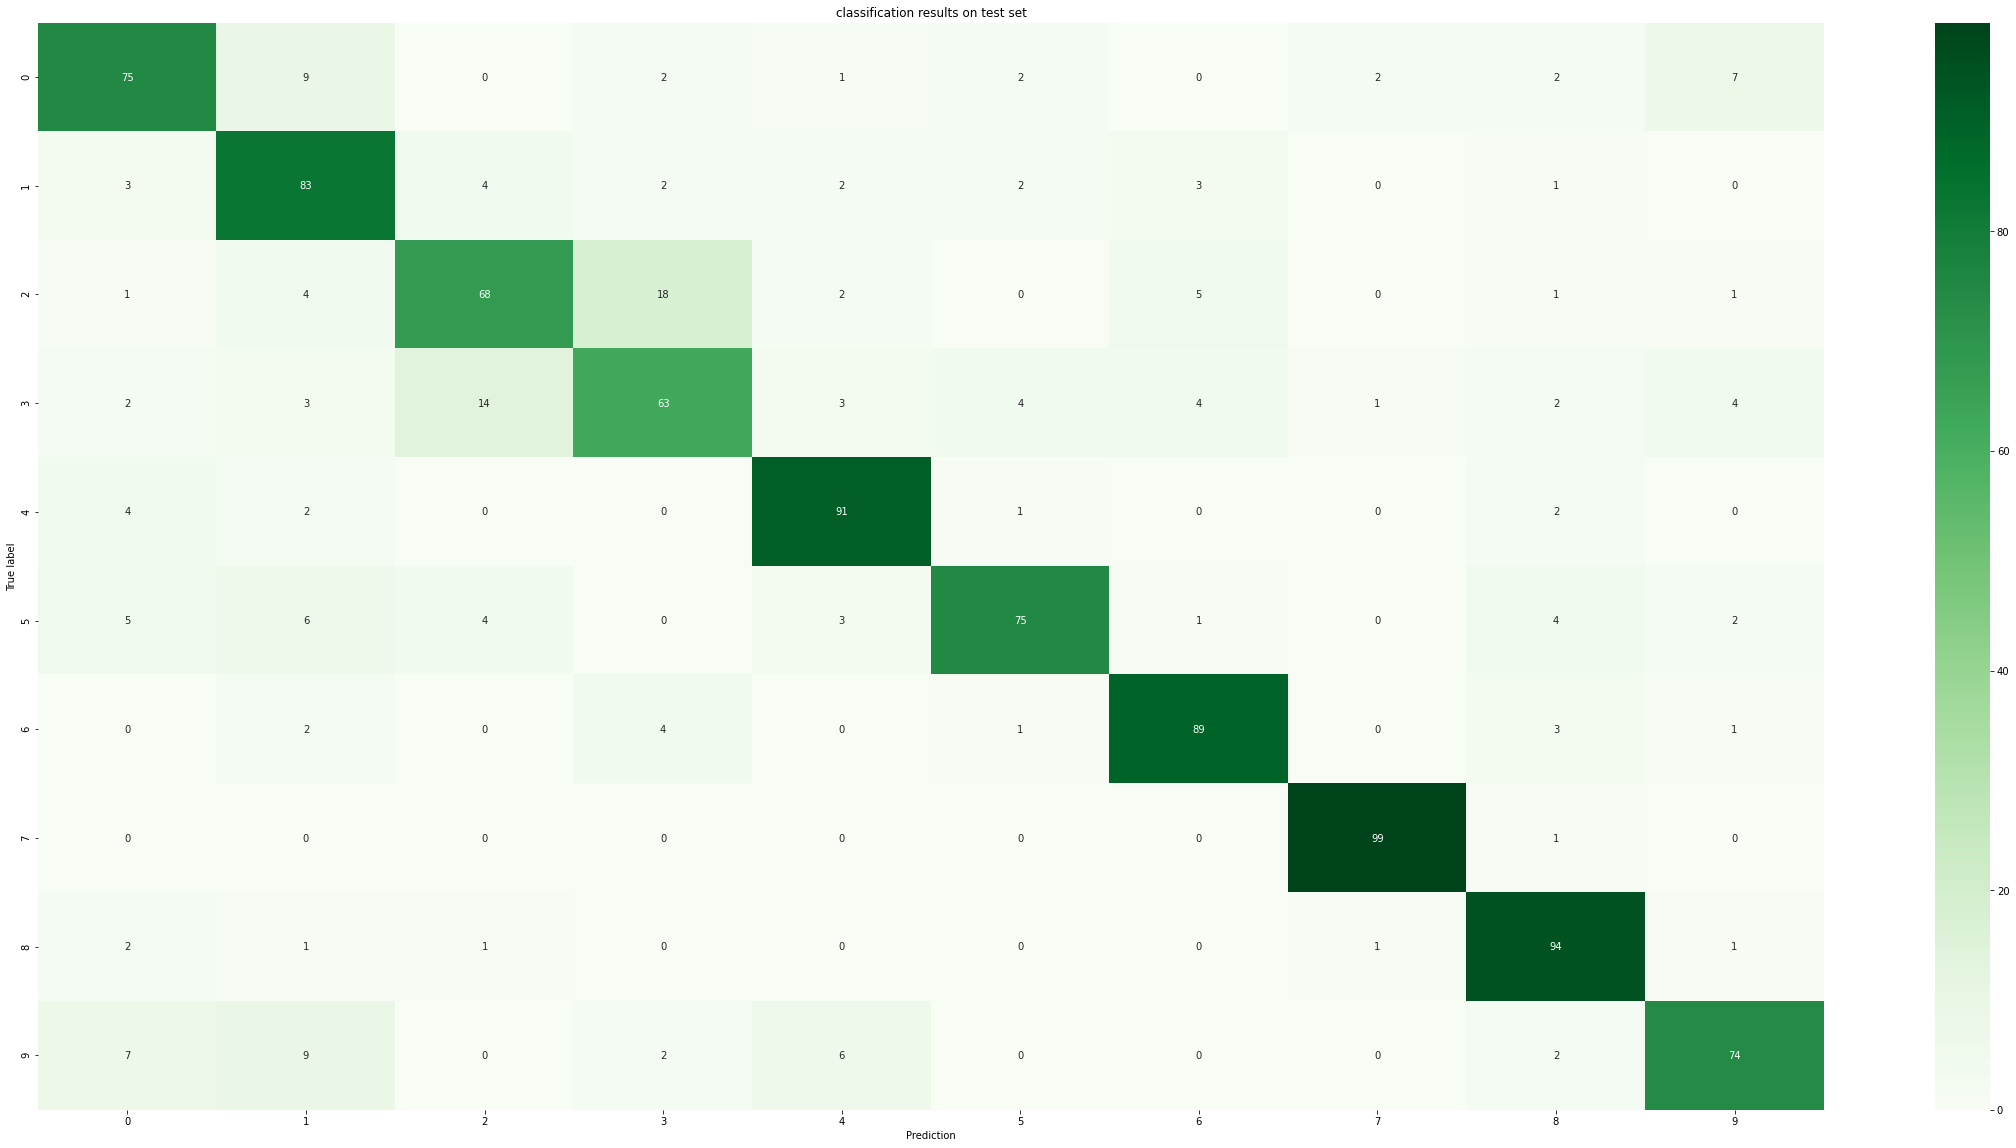

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')